In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn
from datetime import date

In [18]:
df = pd.read_csv('training_data_cleaned.csv')

In [19]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [20]:
df.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,date,recent_date
0,2021-01-20,3,2021,30222,U0117613,Owner Operator,Rosas Transport,Santa Fe Springs,CA,"[""poweronly""]",...,4,1,253,254,0,3,3,257,2021-01-20,2021-02-17
1,2020-03-09,1,2020,4524,C0090405,Fleet,Daylight Transport,Long Beach,CA,"[""dryvan""]",...,6,0,0,0,2671,0,2671,2671,2020-03-09,2021-02-15
2,2020-02-14,5,2020,31164,C0097099,Fleet,First Class Transport #8,Hawthorne,CA,"[""poweronly"", ""dryvan""]",...,1,29,82,111,30,19,49,160,2020-02-14,2020-12-18
3,2019-06-10,1,2019,8859,U0097935,Owner Operator,DTELLIS TRUCKING,Long Beach,CA,"[""dryvan""]",...,1,25,6,31,0,1,1,32,2019-06-10,2020-02-16
4,2019-12-03,2,2019,18870,U0106560,Owner Operator,Z&N Transport,Los Angeles,CA,"[""dryvan""]",...,4,1,233,234,0,9,9,243,2019-12-03,2020-02-18


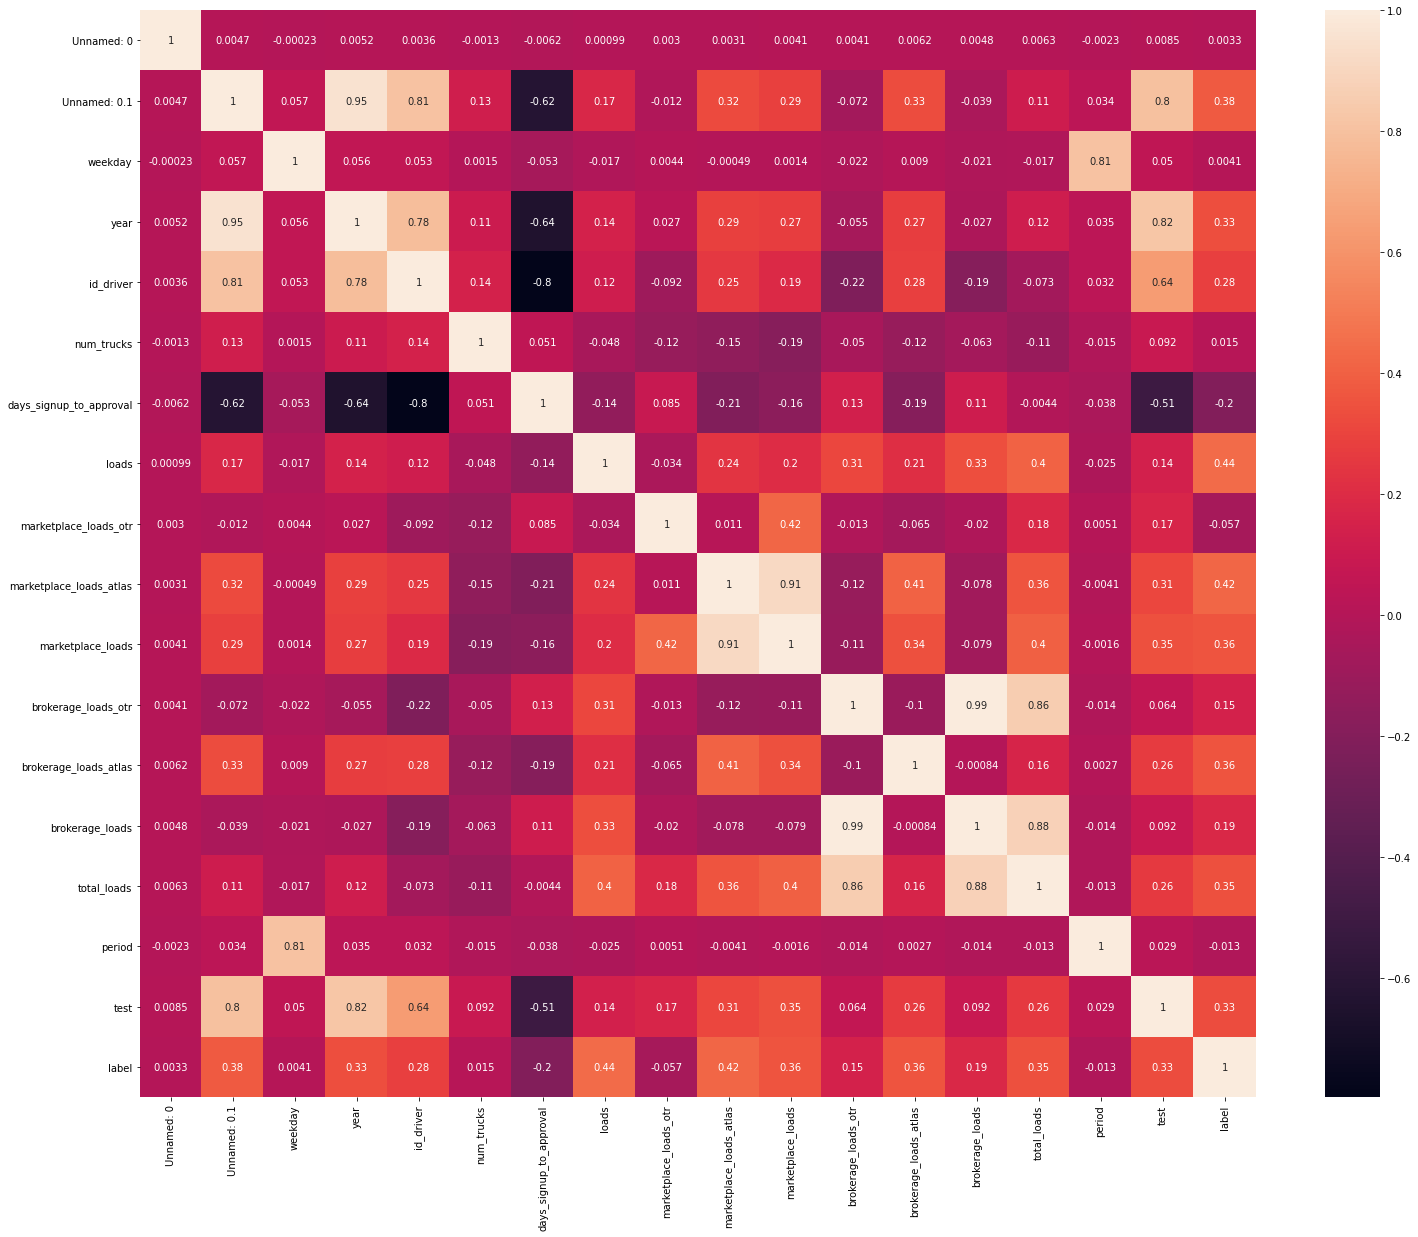

In [10]:
plt.figure(figsize=(25,20))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83414 entries, 0 to 83413
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                83414 non-null  int64  
 1   Unnamed: 0.1              83414 non-null  int64  
 2   dt                        83414 non-null  object 
 3   weekday                   83414 non-null  int64  
 4   year                      83414 non-null  int64  
 5   id_driver                 83414 non-null  int64  
 6   id_carrier_number         83414 non-null  object 
 7   dim_carrier_type          83414 non-null  object 
 8   dim_carrier_company_name  83367 non-null  object 
 9   home_base_city            83370 non-null  object 
 10  home_base_state           83370 non-null  object 
 11  carrier_trucks            83414 non-null  object 
 12  num_trucks                83344 non-null  float64
 13  interested_in_drayage     83414 non-null  object 
 14  port_q

In [27]:
loads_75 = df.loads.describe()['75%']
loads_75

2.0

In [48]:
oldest = date.fromisoformat(df.most_recent_load_date.min())
newest = date.fromisoformat(df.most_recent_load_date.max())
total_days = newest - oldest
oldest, newest, total_days

(datetime.date(2015, 10, 26),
 datetime.date(2021, 2, 17),
 datetime.timedelta(days=1941))

In [49]:
most_recent_load_date_75 = total_days * 0.75 + oldest
most_recent_load_date_75

datetime.date(2019, 10, 20)

In [51]:
df[df.loads >= loads_75].shape

(31373, 37)

In [53]:
df[date.fromisoformat(df.most_recent_load_date) >= most_recent_load_date_75]

TypeError: fromisoformat: argument must be str